In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('train.csv')
df.head()

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,GrossPay
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,$11310.00,$873.63
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,$53428.00,$52868.38
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,$68300.00,$67439.19
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,$62000.00,$58654.74
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,$43999.00,$39686.95


In [ ]:
# We need to clean data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18981 entries, 0 to 18980
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0    Name         18981 non-null  object
 1   JobTitle      18981 non-null  object
 2   AgencyID      18981 non-null  object
 3   Agency        18981 non-null  object
 4   HireDate      18911 non-null  object
 5   AnnualSalary  18981 non-null  object
 6   GrossPay      15758 non-null  object
dtypes: object(7)
memory usage: 1.0+ MB


In [ ]:
df.columns

Index([' Name', 'JobTitle', 'AgencyID', 'Agency', 'HireDate', 'AnnualSalary',
       'GrossPay'],
      dtype='object')

In [ ]:
# Remove leading spaces in column names
df.columns=df.columns.str.strip()
df.columns

Index(['Name', 'JobTitle', 'AgencyID', 'Agency', 'HireDate', 'AnnualSalary',
       'GrossPay'],
      dtype='object')

In [ ]:
# Check null values
df.isnull().sum()

Name               0
JobTitle           0
AgencyID           0
Agency             0
HireDate          70
AnnualSalary       0
GrossPay        3223
dtype: int64

In [ ]:
# Drop 70 rows of HireDate as it is < 1% values
df=df.dropna(subset=['HireDate'])
df.isnull().sum()

Name               0
JobTitle           0
AgencyID           0
Agency             0
HireDate           0
AnnualSalary       0
GrossPay        3223
dtype: int64

In [ ]:
# Drop GrossPay, since we choose AnnualSalary as dependant variable instead
df=df.drop('GrossPay',axis=1)
df.isnull().sum()

Name            0
JobTitle        0
AgencyID        0
Agency          0
HireDate        0
AnnualSalary    0
dtype: int64

In [ ]:
# Check value_counts for all columns
df.JobTitle.value_counts()

AIDE BLUE CHIP                   4817
POLICE OFFICER                   1866
LABORER (Hourly)                  597
EMT Firefighter Suppression       358
CROSSING GUARD                    337
                                 ... 
CITY SOLICITOR                      1
LIENS PROCESS SUPERVISOR            1
DIRECTOR ORAL HEALTH SERVICES       1
ASSISTANT CHIEF EOC                 1
SERVICE AIDE II                     1
Name: JobTitle, Length: 1073, dtype: int64

In [ ]:
df.AgencyID.value_counts()

P04001    316
C90786    276
W02629    193
P04002    191
A99416    166
         ... 
W02339      1
W02658      1
W02682      1
B68080      1
W02698      1
Name: AgencyID, Length: 1177, dtype: int64

In [ ]:
df.Agency.value_counts()

Youth Summer                4323
Police Department           3141
Fire Department             1576
DPW-Water & Waste Water     1491
HLTH-Health Department       833
                            ... 
HLTH-Health Dept Locatio       6
M-R Labor Commissioner         6
Legislative Reference          5
M-R Cable & Comm               4
Special City Services          4
Name: Agency, Length: 65, dtype: int64

In [ ]:
df.HireDate.value_counts()

05/21/2014    1478
06/10/2013     696
06/12/2012     541
06/07/2011     368
05/29/2014     347
              ... 
08/26/1999       1
01/12/1994       1
11/06/1997       1
07/30/1984       1
01/28/1992       1
Name: HireDate, Length: 4737, dtype: int64

In [ ]:
df.AnnualSalary.value_counts()

$11310.00    4811
$20800.00     325
$29245.00     196
$43999.00     169
$44773.00     162
             ... 
$74300.00       1
$75933.00       1
$94640.00       1
$42341.00       1
$52283.00       1
Name: AnnualSalary, Length: 1590, dtype: int64

In [ ]:
# Remove '$' from AnnualSalary, and convert it to int64
df['AnnualSalary']=df['AnnualSalary'].apply(lambda x : (float)(str(x)[1:]))
df.AnnualSalary.value_counts()

11310.0    4811
20800.0     325
29245.0     196
43999.0     169
44773.0     162
           ... 
35509.0       1
25945.0       1
51889.0       1
39600.0       1
86400.0       1
Name: AnnualSalary, Length: 1590, dtype: int64

In [ ]:
# Break HireDate to Day, Month, Year
df['HireMonth']=df['HireDate'].apply(lambda x : (int)(str(x)[0:2]))
df['HireDay']=df['HireDate'].apply(lambda x : (int)(str(x)[3:5]))
df['HireYear']=df['HireDate'].apply(lambda x : (int)(str(x)[6:]))
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18911 entries, 0 to 18980
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          18911 non-null  object 
 1   JobTitle      18911 non-null  object 
 2   AgencyID      18911 non-null  object 
 3   Agency        18911 non-null  object 
 4   HireDate      18911 non-null  object 
 5   AnnualSalary  18911 non-null  float64
 6   HireMonth     18911 non-null  int64  
 7   HireDay       18911 non-null  int64  
 8   HireYear      18911 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 1.4+ MB


In [ ]:
# Trim spaces and capitalise AgencyID, Agency, JobTitle
df['AgencyID']=df['AgencyID'].apply(lambda x : str(x).strip().replace('  ',' ').upper())
df['Agency']=df['Agency'].apply(lambda x : str(x).strip().replace('  ',' ').upper())
df['JobTitle']=df['JobTitle'].apply(lambda x : str(x).strip().replace('  ',' ').upper())

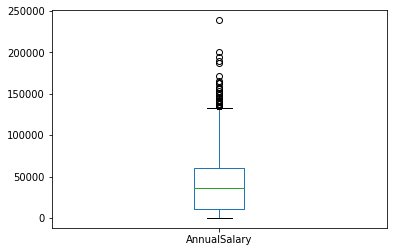

In [ ]:
# Outlier Treatment: Box plot for AnnualSalary      
df.AnnualSalary.plot.box()
plt.show()

In [ ]:
# To eliminate outliers, check AnnualSalary summary statistics
df.AnnualSalary.describe()

count     18911.000000
mean      39660.421889
std       25163.465942
min           0.000000
25%       11310.000000
50%       36203.000000
75%       60300.000000
max      238772.000000
Name: AnnualSalary, dtype: float64

In [ ]:
df.shape

(18911, 9)

In [ ]:
# Max > mean,median. So, delete values where AnnualSalary > 170000
df=df[df['AnnualSalary']<=170000]
df.shape

(18905, 9)

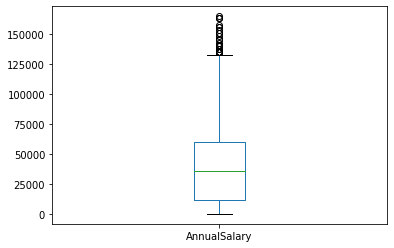

In [ ]:
# Points above 75% line, very close, so left alone
df.AnnualSalary.plot.box()
plt.show()

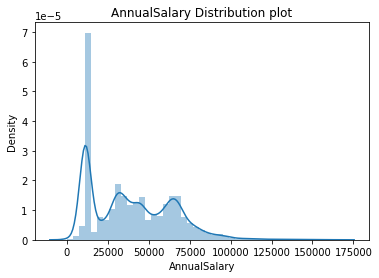

In [ ]:
# After Data preparation, perform exploratory data analysis             Target variable- AnnualSalary
sns.distplot(df.AnnualSalary)
plt.title('AnnualSalary Distribution plot')
plt.show()

# Not many have salary>100000

Text(0.5, 1.0, 'Top 15 Hiring Jobs')

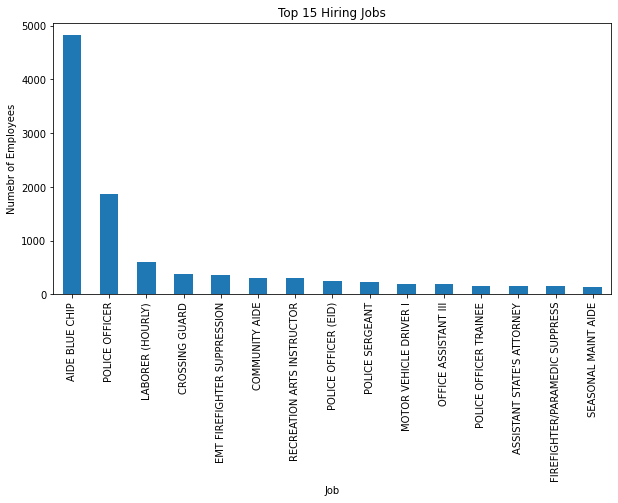

In [ ]:
# Top 15 jobs based on hiring
plt.figure(figsize=(10,5))
df.groupby(['JobTitle'])['Name'].count().sort_values(ascending=False).head(15).plot.bar()
plt.xlabel('Job')
plt.ylabel('Numebr of Employees')
plt.title('Top 15 Hiring Jobs')

# AIDE BLUE CHIP has more than double the workers as POLICE OFFICER. Other JobTitles have less than 1000 workers

Text(0.5, 1.0, 'Top 15 Highest Paying Jobs')

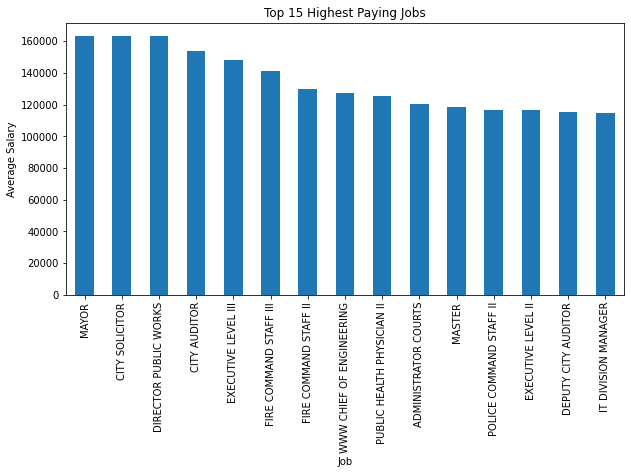

In [ ]:
# Top 15 jobs based on salary
plt.figure(figsize=(10,5))
df.groupby(['JobTitle'])['AnnualSalary'].mean().sort_values(ascending=False).head(15).plot.bar()
plt.xlabel('Job')
plt.ylabel('Average Salary')
plt.title('Top 15 Highest Paying Jobs')

In [ ]:
# Number of jobs after taking AnnualSalary <=170000
df.JobTitle.value_counts()

# 1059 Jobs exist 

AIDE BLUE CHIP                    4817
POLICE OFFICER                    1866
LABORER (HOURLY)                   597
CROSSING GUARD                     374
EMT FIREFIGHTER SUPPRESSION        358
                                  ... 
SOUND EQUIPMENT TECHNICIAN           1
AUDITOR SUPV                         1
CRIMINALIST SUPV TRACE ANALYSI       1
EDP DATA TECHNICIAN SUPERVISOR       1
PUBLIC INFORMATION OFFICER SAO       1
Name: JobTitle, Length: 1059, dtype: int64

In [ ]:
# Find number of jobs with salary > mean salary
mean_AnnualSalary=df.AnnualSalary.mean()
high_pay_jobs=df.groupby(['JobTitle'])['AnnualSalary'].mean().reset_index()
high_pay_jobs[high_pay_jobs.AnnualSalary>mean_AnnualSalary]['JobTitle'].count()

# 802 of 1059 jobs pay more than mean salary

802

Text(0.5, 1.0, 'Top 15 Agencies with most workers')

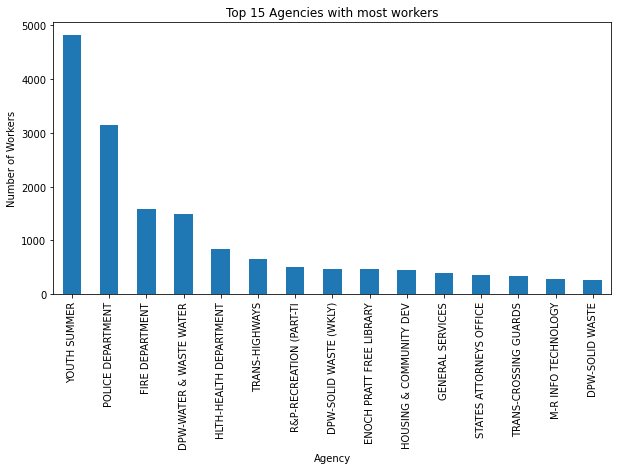

In [ ]:
# Top 15 agencies based on number of workers
plt.figure(figsize=(10,5))
df.groupby(['Agency'])['Name'].count().sort_values(ascending=False).head(15).plot.bar()
plt.xlabel('Agency')
plt.ylabel('Number of Workers')
plt.title('Top 15 Agencies with most workers')

# Youth Summer has maximum employee count followed by Police Department. Fire Department and DPW - Water & Waste Water have almost the same.

Text(0.5, 1.0, 'Top 15 Agency IDs with most workers')

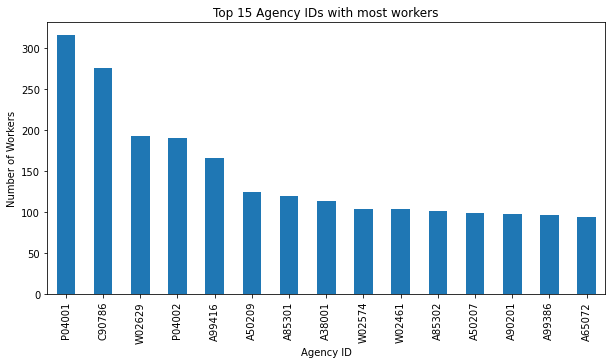

In [ ]:
# Top 15 agency IDs based on number of workers
plt.figure(figsize=(10,5))
df.groupby(['AgencyID'])['Name'].count().sort_values(ascending=False).head(15).plot.bar()
plt.xlabel('Agency ID')
plt.ylabel('Number of Workers')
plt.title('Top 15 Agency IDs with most workers')

# P04001 has maximim employees followed by C90786

Text(0.5, 1.0, 'Average Salary vs Hired Year')

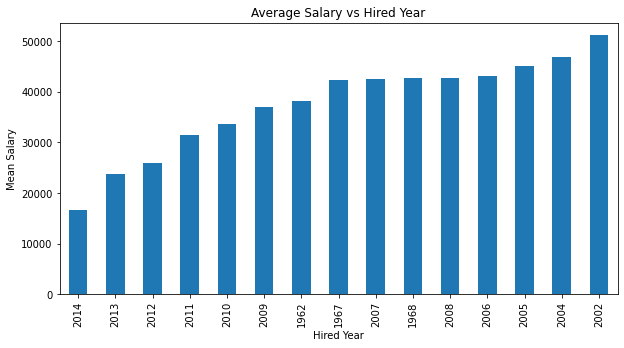

In [ ]:
# Salary vs HireYear(Experience)
plt.figure(figsize=(10,5))
df.groupby(['HireYear'])['AnnualSalary'].mean().sort_values().head(15).plot.bar()
plt.xlabel('Hired Year')
plt.ylabel('Mean Salary')
plt.title('Average Salary vs Hired Year')

# Salary increases with experience, so we can check expreience in the company by days

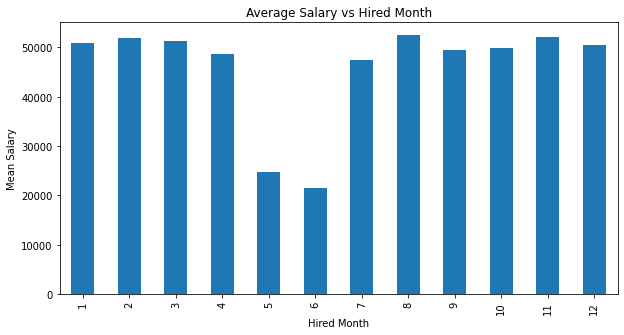

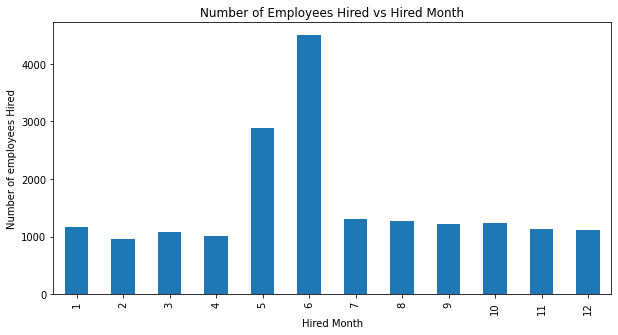

In [ ]:
# Check if HiedMonth has effect
plt.figure(figsize=(10,5))
df.groupby(['HireMonth'])['AnnualSalary'].mean().plot.bar()
plt.xlabel('Hired Month')
plt.ylabel('Mean Salary')
plt.title('Average Salary vs Hired Month')
plt.show()

# Big agencies may not have hired during months 5,6; so gives a lower salary. To check,
plt.figure(figsize=(10,5))
df.groupby(['HireMonth'])['Name'].count().plot.bar()
plt.xlabel('Hired Month')
plt.ylabel('Number of employees Hired')
plt.title('Number of Employees Hired vs Hired Month')
plt.show()

# Recruits are done highest in months 5,6; but have lower mean salary. So, low paying jobs may hire more in months 5,6

<Figure size 1440x1440 with 0 Axes>

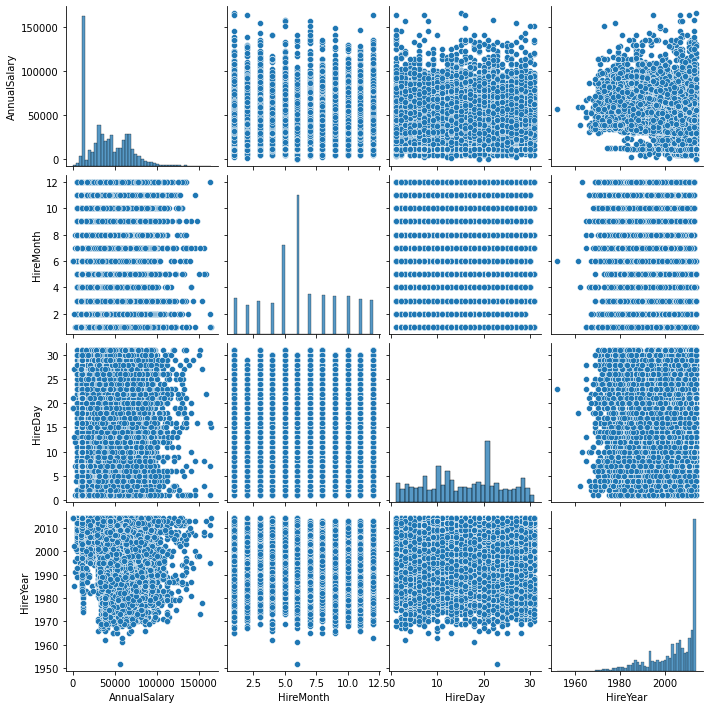

In [ ]:
# Pair plot
plt.figure(figsize=(20,20))
sns.pairplot(df)
plt.show()

# No correlation found

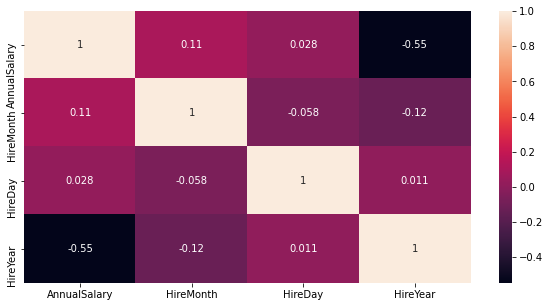

In [ ]:
# Heat map
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)

# Only HireYear seems to have correlation with AnnualSalary

In [ ]:
# After Data exploration, perform Feature engineering. Create a master_df for feature encoding categorical variables- JobTitle, Agency, AgencyID 
master_df=df.copy()

In [ ]:
# Mean encoding JobTitle, i.e. map JobTitle to its mean salary 
mean_encoded_JobTitle=master_df.groupby('JobTitle')['AnnualSalary'].mean()
master_df['JobTitle']=master_df['JobTitle'].map(mean_encoded_JobTitle)
print(master_df['JobTitle'])

0        11313.967200
1        47443.500000
2        69750.666667
3        57940.000000
4        44531.160494
             ...     
18976    11313.967200
18977    11313.967200
18978    44531.160494
18979    60588.139335
18980    53368.428571
Name: JobTitle, Length: 18905, dtype: float64


In [ ]:
# Mean encoding Agency, i.e. map Agency to its mean salary 
mean_encoded_Agency=master_df.groupby('Agency')['AnnualSalary'].mean()
master_df['Agency']=master_df['Agency'].map(mean_encoded_Agency)
print(master_df['Agency'])

0        11313.967200
1        51495.424242
2        64874.560224
3        39980.900360
4        61536.972930
             ...     
18976    11313.967200
18977    11313.967200
18978    61536.972930
18979    61536.972930
18980    42565.513078
Name: Agency, Length: 18905, dtype: float64


In [ ]:
# Mean encoding AgencyID, i.e. map AgencyID to its mean salary 
mean_encoded_AgencyID=master_df.groupby('AgencyID')['AnnualSalary'].mean()
master_df['AgencyID']=master_df['AgencyID'].map(mean_encoded_AgencyID)
print(master_df['AgencyID'])

0        11310.000000
1        46667.000000
2        65926.133333
3        48071.851064
4        44012.307229
             ...     
18976    11310.000000
18977    11310.000000
18978    44012.307229
18979    60203.340426
18980    42407.562500
Name: AgencyID, Length: 18905, dtype: float64


In [ ]:
# Chech non-numeric values
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18905 entries, 0 to 18980
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          18905 non-null  object 
 1   JobTitle      18905 non-null  float64
 2   AgencyID      18905 non-null  float64
 3   Agency        18905 non-null  float64
 4   HireDate      18905 non-null  object 
 5   AnnualSalary  18905 non-null  float64
 6   HireMonth     18905 non-null  int64  
 7   HireDay       18905 non-null  int64  
 8   HireYear      18905 non-null  int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 1.4+ MB


In [ ]:
# Drop Name(not dependent), HireDate(as split into day, month, and year)
master_df=master_df.drop(['Name','HireDate'],axis=1)
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18905 entries, 0 to 18980
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   JobTitle      18905 non-null  float64
 1   AgencyID      18905 non-null  float64
 2   Agency        18905 non-null  float64
 3   AnnualSalary  18905 non-null  float64
 4   HireMonth     18905 non-null  int64  
 5   HireDay       18905 non-null  int64  
 6   HireYear      18905 non-null  int64  
dtypes: float64(4), int64(3)
memory usage: 1.2 MB


In [ ]:
# Split data to train data and test data
Train, Test=train_test_split(master_df,train_size=0.7,random_state=42)
print("Train:",Train.shape)
print("Test:",Test.shape)

Train: (13233, 7)
Test: (5672, 7)


In [ ]:
# Separate Dependent and Independent variables
Y_train=Train.pop('AnnualSalary')
X_train=Train 

Y_test=Test.pop('AnnualSalary')
X_test=Test 

In [ ]:
# Standardize the independent features in a fixed range to the same scale by Standard Scaling
scaler=StandardScaler()

X_train[X_train.columns]=scaler.fit_transform(X_train[X_train.columns])
X_train.describe()

,JobTitle,AgencyID,Agency,HireMonth,HireDay,HireYear
count,1.323300e+04,1.323300e+04,1.323300e+04,1.323300e+04,1.323300e+04,1.323300e+04
mean,1.140342e-16,-2.464757e-16,2.120943e-16,-5.547508e-16,-1.175768e-16,2.652479e-15
std,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00
min,-1.533631e+00,-1.681054e+00,-1.397355e+00,-1.817251e+00,-1.761529e+00,-5.033203e+00
25%,-1.153505e+00,-1.264843e+00,-1.346069e+00,-4.598710e-01,-8.063889e-01,-5.921583e-01
50%,-1.451261e-01,8.383052e-02,1.387464e-01,-1.205261e-01,2.935866e-02,2.767418e-01
75%,8.574920e-01,9.065853e-01,1.040114e+00,5.581638e-01,7.457137e-01,8.560085e-01
max,5.052063e+00,4.609048e+00,2.225785e+00,1.915544e+00,1.820246e+00,9.525530e-01


In [ ]:
X_test[X_test.columns]=scaler.fit_transform(X_test[X_test.columns])
X_test.describe()

,JobTitle,AgencyID,Agency,HireMonth,HireDay,HireYear
count,5.672000e+03,5.672000e+03,5.672000e+03,5.672000e+03,5.672000e+03,5.672000e+03
mean,2.309115e-16,8.103532e-18,-3.071708e-16,-2.992337e-17,1.491520e-17,9.979402e-15
std,1.000088e+00,1.000088e+00,1.000088e+00,1.000088e+00,1.000088e+00,1.000088e+00
min,-1.497230e+00,-1.541896e+00,-1.392454e+00,-1.828473e+00,-1.757741e+00,-3.717102e+00
25%,-1.164013e+00,-1.274267e+00,-1.341146e+00,-4.742342e-01,-8.069808e-01,-5.672626e-01
50%,-1.503847e-01,8.849087e-02,1.443137e-01,-1.356746e-01,2.493398e-02,2.917846e-01
75%,8.574528e-01,9.056114e-01,1.046072e+00,8.800044e-01,7.380038e-01,8.644827e-01
max,5.067090e+00,3.126607e+00,2.232258e+00,1.895683e+00,1.807609e+00,9.599324e-01


In [ ]:
# Build Linear Regression Model
linear_model=LinearRegression()
linear_model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Ckeck r_square score (goodness of fit) for Train data - Accuracy %   
linear_model.score(X_train,Y_train)

# Close to 1

0.96279178918782

In [ ]:
# Ckeck r_square score (goodness of fit) for Test data - Accuracy %    
linear_model.score(X_test,Y_test)

0.9652895233339007

In [ ]:
from sklearn.metrics import mean_squared_error

# Check error in Training model
y_train_predict=linear_model.predict(X_train)
rms_err=(np.sqrt(mean_squared_error(Y_train,y_train_predict)))
print("Train RMSE: {}".format(rms_err) )

# Check error in Test model
y_test_predict=linear_model.predict(X_test)
rms_err=(np.sqrt(mean_squared_error(Y_test,y_test_predict)))
print("Test RMSE: {}".format(rms_err) )

Train RMSE: 4833.702060929224
Test RMSE: 4636.716642168846


Text(0, 0.5, 'Prediction')

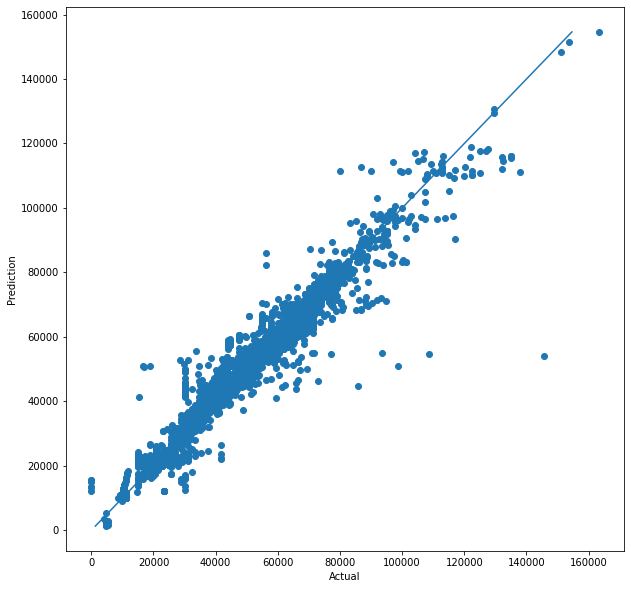

In [ ]:
# Plot Regression line obtained
plt.figure(figsize=(10,10))
plt.scatter(Y_test,y_test_predict)
plt.plot([min(y_test_predict),max(y_test_predict)],[min(y_test_predict),max(y_test_predict)])
plt.xlabel('Actual')
plt.ylabel('Prediction')

In [ ]:
# Equation Parameters
print("Coeffecients:",linear_model.coef_)
print("Intercept",linear_model.intercept_)

Coeffecients: [22420.01397853  2770.29585353 -1631.05119872  -123.66781495
   -53.71130482 -2065.6970067 ]
Intercept 39582.79799289656


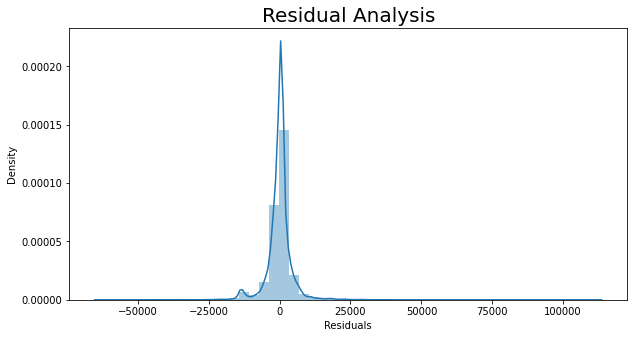

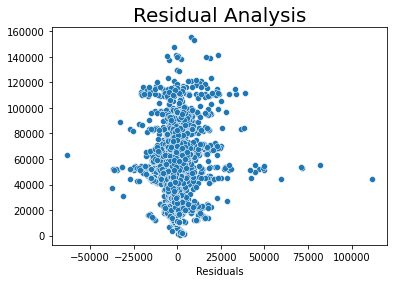

In [ ]:
# Plot Distribution plot of Residuals should be normal - true
plt.figure(figsize=(10,5))
target_prediction = linear_model.predict(X_train)
residual = Y_train - target_prediction
sns.distplot(residual)
plt.xlabel('Residuals')
plt.title("Residual Analysis",fontsize=20)
plt.show()

# Residuals must not be related - true
sns.scatterplot(x=residual,y=target_prediction)
plt.xlabel('Residuals')
plt.title("Residual Analysis",fontsize=20)
plt.show()

In [ ]:
# Model Equation
model = str(linear_model.intercept_)

for i in range(len(linear_model.coef_)):
    model = model +' + '  +(str(linear_model.coef_[i])) + ' * ' +(str(X_train.columns[i]))
print("AnnualSalary =",model)

# AgencyID, JobTitle and HireYear are the major drivers for Annual Salary as seen.

AnnualSalary = 39582.79799289656 + 22420.013978534127 * JobTitle + 2770.295853527711 * AgencyID + -1631.0511987215266 * Agency + -123.66781495316889 * HireMonth + -53.71130481796719 * HireDay + -2065.6970067039892 * HireYear
